In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train_titanic.csv")

In [7]:
df2 = pd.read_csv("test_titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

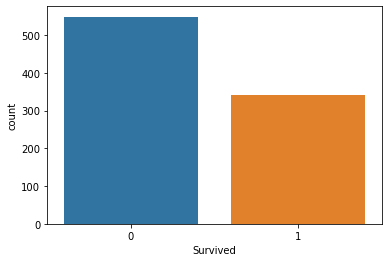

In [11]:
sns.countplot(data=df, x='Survived')

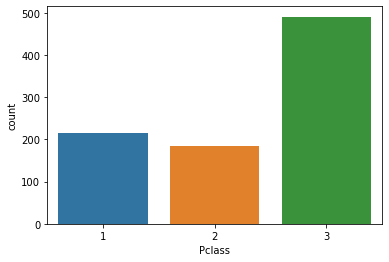

In [12]:
sns.countplot(data=df, x='Pclass');

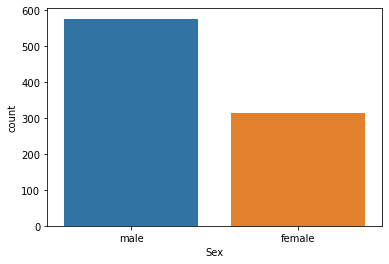

In [13]:
sns.countplot(data=df, x='Sex');

In [24]:
check = df[['Sex', 'Age', 'Survived']]

In [34]:
survived_peeps = check[check['Survived']==1]

In [35]:
survived_peeps['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [38]:
survived_peeps['Age'].value_counts()

24.00    15
36.00    11
35.00    11
27.00    11
22.00    11
         ..
55.00     1
32.50     1
12.00     1
0.92      1
47.00     1
Name: Age, Length: 65, dtype: int64

In [72]:
sum(df['Survived'].isnull())

0

In [73]:
sum(df['Survived'].isnull())

0

In [55]:
df = df.dropna()

In [56]:
X_train = df[['Age']]
y_train = df[['Survived']]

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dtc = DecisionTreeClassifier()

In [66]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [67]:
df2 = df2.dropna()

In [74]:
X_test = df2[['Age']]

In [75]:
y_pred = dtc.predict(X_test)

In [76]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1],
      dtype=int64)

In [77]:
y_pred = pd.DataFrame(y_pred, columns=['Survived'])

In [78]:
y_pred.head()

,Survived
0,1
1,0
2,1
3,1
4,1


In [84]:
test_dataid = df2['PassengerId'].copy()

In [91]:
test_dataid = pd.DataFrame(test_dataid, columns=['PassengerId'])

In [92]:
test_dataid.head()

,PassengerId
12,904
14,906
24,916
26,918
28,920


In [93]:
submission = pd.concat([test_dataid, y_pred], axis=1)

In [94]:
submission.head()

,PassengerId,Survived
0,NaN,1.0
1,NaN,0.0
2,NaN,1.0
3,NaN,1.0
4,NaN,1.0


12      904
14      906
24      916
26      918
28      920
       ... 
404    1296
405    1297
407    1299
411    1303
414    1306
Name: PassengerId, Length: 87, dtype: int64

In [89]:
a = pd.DataFrame(df2['PassengerId'] , columns = ['PassengerId'])
b = pd.DataFrame(y_pred , columns=['Prediction_survived'])
submission = pd.concat([a,b], axis=1)

In [90]:
submission.head()

,PassengerId,Prediction_survived
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
